In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from scipy.spatial import distance_matrix

In [2]:
#img = cv2.imread('/Volumes/Aligned_data/tect_seg/Good_seg_test_cropped.tif')
img = cv2.imread('/181004_Enriched_F1__00003_scaled_aligned/meanim_slice_2_00001.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

error: OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


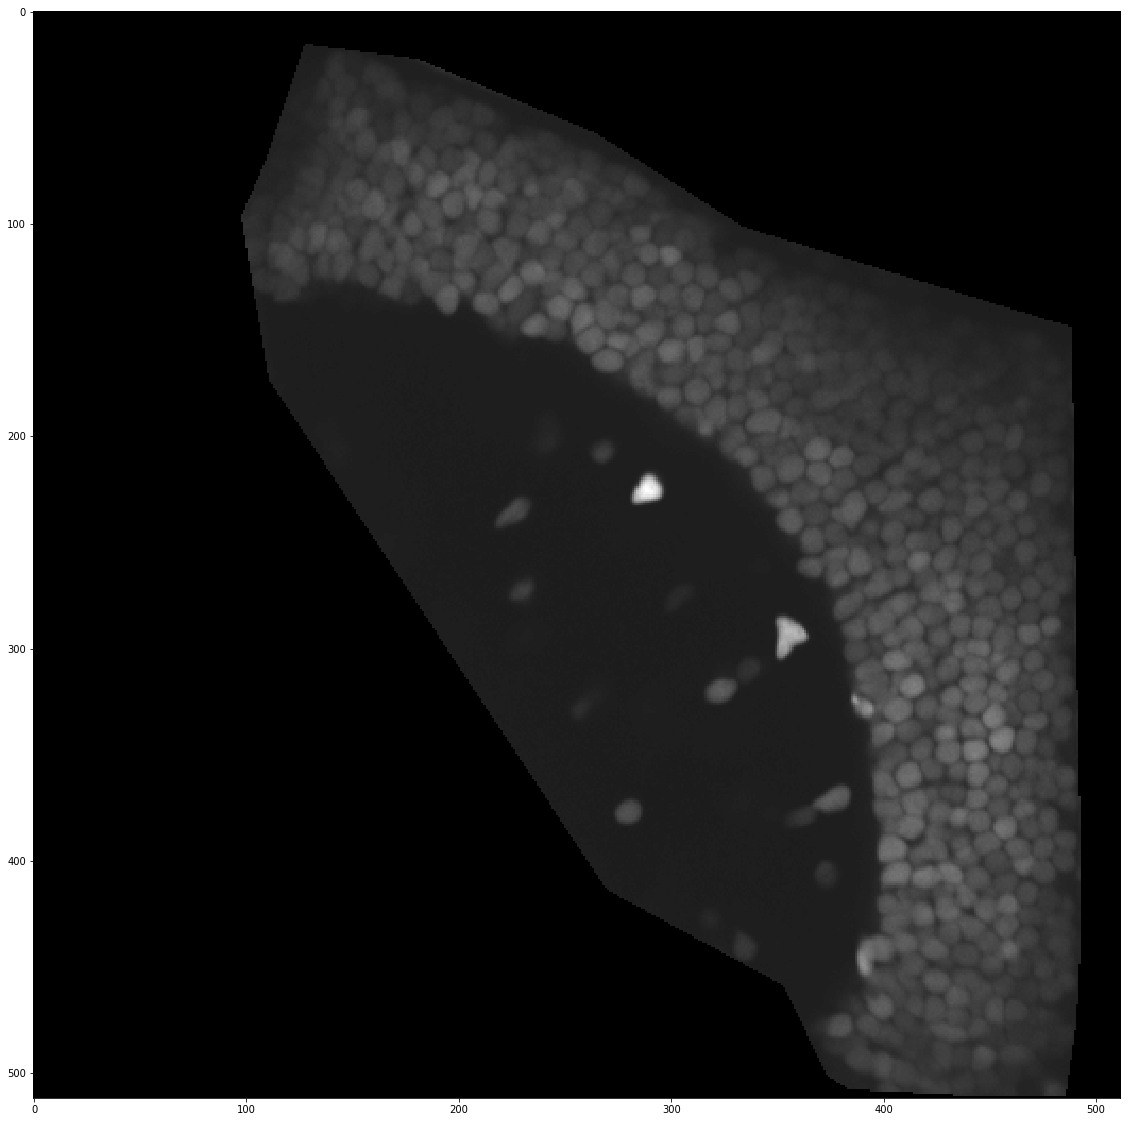

In [41]:
plt.figure(figsize=(20,20))
plt.imshow(gray, cmap = "gray")

In [42]:
gauss = filters.gaussian(gray, sigma = 1)

In [43]:
np.max(gauss)

0.9850764387374047

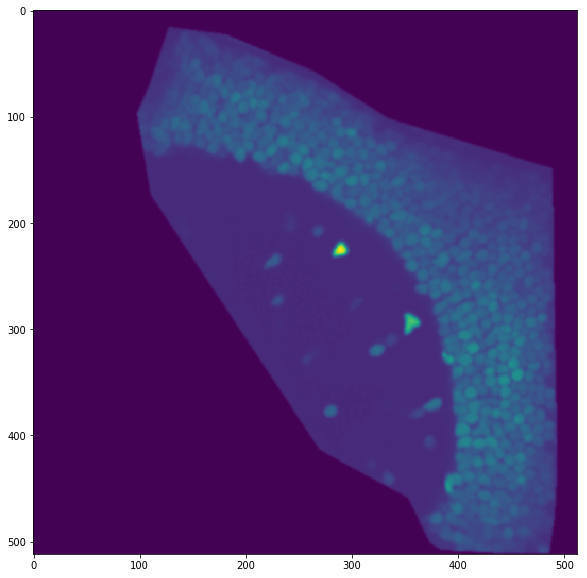

In [44]:
plt.figure(figsize = (10,10))
plt.imshow(gauss, vmin = 0.5, vmax = 0.99)

In [45]:
gauss [gauss < 0.62] =0 

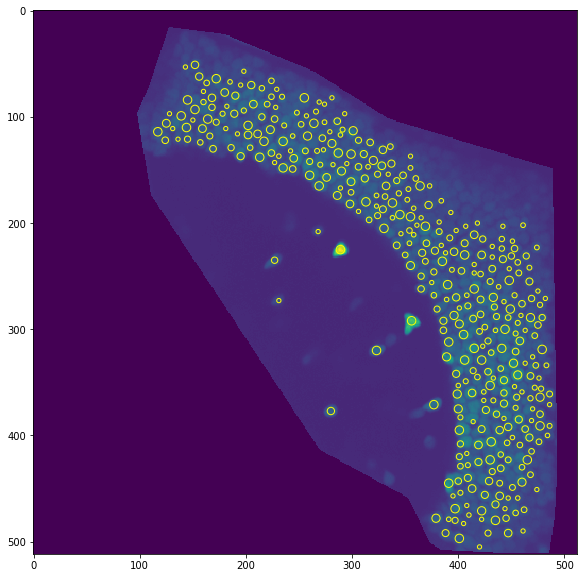

In [46]:
blobs_log = blob_log(gauss, min_sigma =2, max_sigma=4, num_sigma=200, threshold=0.001, overlap=0.1)

fig, ax = plt.subplots(figsize=(10, 10), sharex=True, sharey=True)


ax.imshow(gray, interpolation='nearest')
for i in range(blobs_log.shape[0]):
    y, x, r = blobs_log [i,]
    c = plt.Circle((x, y), r, color="yellow", linewidth=1, fill=False)
    ax.add_patch(c)

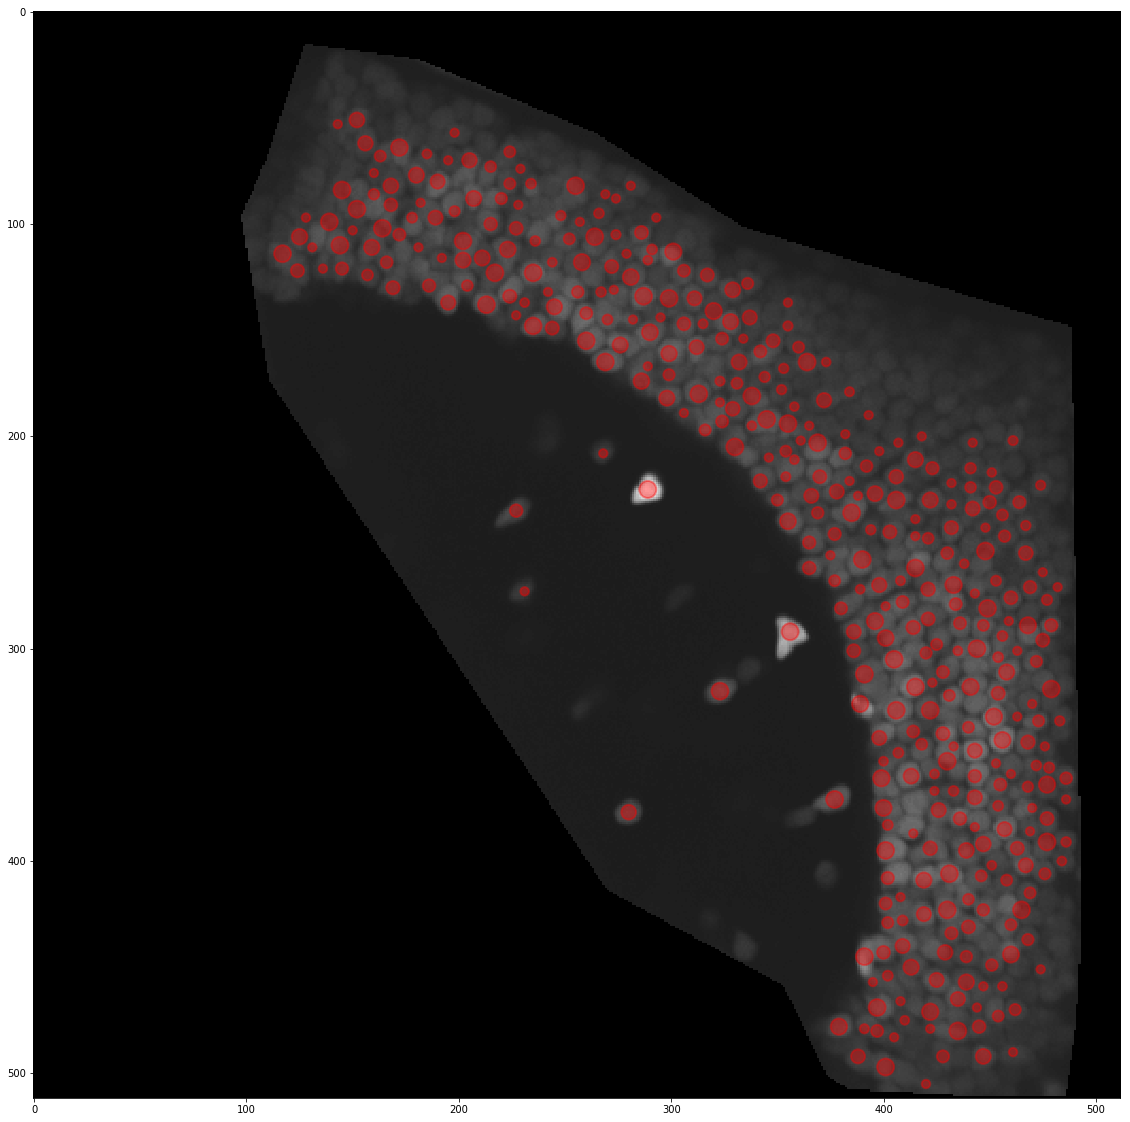

In [47]:
fig, ax = plt.subplots(figsize=(20, 20), sharex=True, sharey=True)


ax.imshow(gray, interpolation='nearest',cmap="gray")
for i in range(blobs_log.shape[0]):
    y, x, r = blobs_log [i,]
    if r > 1.5:
        c = plt.Circle((x, y), r, color="red", alpha = 0.4, linewidth=2, fill=True)
        ax.add_patch(c)
    else:
        c = plt.Circle((x, y), r, color="cyan", linewidth=2, fill=False)
        ax.add_patch(c)

In [48]:
blobs_log.shape [0]

377

In [49]:
def count_cells(path, prefix):
    counts = np.zeros((1, 5))
    for i in range(5):
        img = cv2.imread(path + prefix + "/meanim_slice_" + str(i +1) + "_00001.tif")
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        gauss = filters.gaussian(gray, sigma = 1)
        gauss [gauss < 0.5] =0 
        blobs_log = blob_log(gauss, min_sigma =2, max_sigma=4, num_sigma=200, threshold=0.001, overlap=0.1)
        print(str(1))
        counts [0] [i] =  blobs_log.shape [0]
        np.savetxt(X=counts, fname=path + prefix+ "/" + prefix +"_cell_counts.txt")
    return([[counts], np.sum(counts)])

In [ ]:
a = count_cells(path = "/Volumes/Aligned_data/tect_seg/", prefix = "181004_Enriched_F1__00003_scaled_aligned")

In [ ]:
a

In [19]:
path = "/Volumes/Aligned_data/tect_seg/"
prefix = "181004_Enriched_F1__00003_scaled_aligned"
i = 1

In [20]:
path + prefix + "/meanim_slice_" + str(i) + "_00001.tif"

'/Volumes/Aligned_data/tect_seg/181004_Enriched_F1__00003_scaled_aligned/meanim_slice_1_00001.tif'

In [23]:
img = cv2.imread(path + prefix + "/meanim_slice_" + str(i) + "_00001.tif")

In [25]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

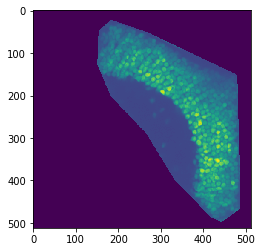

In [26]:
plt.imshow(gray)

In [1]:
 for i in range(5):
        print(str(i))

0
1
2
3
4
